In [93]:
#Import Libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import hvplot.pandas
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.regressor import prediction_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

In [94]:
#Import train set in a DF
train_set = pd.read_excel('/Users/lucy/Desktop/zoopla/train_set.xlsx')

In [95]:
#Import test set in a DF
test_set = pd.read_excel('/Users/lucy/Desktop/zoopla/test_set.xlsx')

In [96]:
#Check missing values in training set
train_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [97]:
#Check missing values in the test set
test_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [98]:
#View train_set info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 0 to 11817
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   11818 non-null  int64  
 1   bathrooms                                  11818 non-null  int64  
 2   num_reception                              11818 non-null  int64  
 3   latitude                                   11818 non-null  float64
 4   longitude                                  11818 non-null  float64
 5   monthly rent                               11818 non-null  int64  
 6   dist_rail                                  11818 non-null  float64
 7   dist_school                                11818 non-null  float64
 8   bed*recep                                  11818 non-null  int64  
 9   bath*recep                                 11818 non-null  int64  
 10  property type_Detached

In [99]:
#Get test_set info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 0 to 11817
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   11818 non-null  int64  
 1   bathrooms                                  11818 non-null  int64  
 2   num_reception                              11818 non-null  int64  
 3   latitude                                   11818 non-null  float64
 4   longitude                                  11818 non-null  float64
 5   monthly rent                               11818 non-null  int64  
 6   dist_rail                                  11818 non-null  float64
 7   dist_school                                11818 non-null  float64
 8   bed*recep                                  11818 non-null  int64  
 9   bath*recep                                 11818 non-null  int64  
 10  property type_Detached

In [100]:
#Split the train_set into X and y
X = train_set.drop("monthly rent", axis=1)

y = train_set["monthly rent"].copy() 

In [101]:
#Feature scaling the variables using the standard scaler

scaler = StandardScaler()

#Drop the target to feature scale the independent variables
trainset_target = train_set["monthly rent"].values
trainset_pred = train_set.drop("monthly rent", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_pred)
train_set = pd.DataFrame(scaled_vals, columns=trainset_pred.columns)

# put the non-scaled target back in
train_set['monthly rent'] = trainset_target

# inspect the data
train_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,0.603825,-0.428152,0.314012,-0.540161,-0.868612,0.261933,-0.605021,0.465122,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,1050
1,-0.858921,-0.428152,0.314012,-0.453407,-0.733391,-0.470977,-0.917464,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
2,-0.127548,-0.428152,1.857043,2.404435,-1.411497,1.824907,-0.355911,0.908913,0.735518,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,525
3,-0.127548,-0.428152,0.314012,1.492052,0.248454,1.331755,-0.064578,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,675
4,-0.127548,-0.428152,0.314012,0.197996,1.313266,-0.460751,-0.719021,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650


In [102]:
#Feature scaling on test set
testset_target = test_set["monthly rent"].values
testset_predictors = test_set.drop("monthly rent", axis=1)


scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
test_set['monthly rent'] = testset_target

test_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,-0.127548,-0.428152,-1.229019,1.963490,-1.529825,-0.209061,1.590527,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,895
1,-0.127548,-0.428152,-1.229019,-1.317940,-0.784950,0.168757,-0.292578,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,650
2,-0.858921,-0.428152,0.314012,-0.476201,-0.739119,-0.688010,0.328087,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
3,-0.127548,-0.428152,0.314012,0.222997,1.207534,0.165916,-0.786576,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650
4,2.066572,4.633014,0.314012,-0.811858,0.347018,-0.109067,-0.398133,1.352705,3.171714,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,2500


In [103]:
# drop target from training set, but keep all others
X_train = train_set.drop("monthly rent", axis=1)

#Only target
y_train = train_set["monthly rent"].copy()

In [104]:
# drop target from test set, but keep all others
X_test = test_set.drop("monthly rent", axis=1)

#Only target
y_test = test_set["monthly rent"].copy()

In [105]:
#Defining a function to calculate cross validation scores
def display_crosval_scores(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    print('MAE:', mae_scores.mean())
    print('RMSE:', rmse_scores.mean())
    print('R2 Square:', r2_scores.mean())
    print('__________________________________')

#Defining a function to perform cross validation
def cross_val(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    return mae_scores.mean(), rmse_scores.mean(), r2_scores.mean()

#Defining a function to print model scores
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
#Defining a function to evaluate the model 
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, rmse, r2_square

In [106]:
#Build NN model
basic_nn = MLPRegressor()

In [107]:
#fit to training set
basic_nn.fit(X_train, y_train)

MLPRegressor()

In [109]:
#predict y in training set
base_train = basic_nn.predict(X_train)

In [110]:
#model results in a df
train = pd.DataFrame(data=[["Training Set","1",*evaluate(y_train, base_train)]], 
                          columns=["Neural Network","Hidden Layers",'MAE', 'RMSE', 'R2 Square'])
train

,Neural Network,Hidden Layers,MAE,RMSE,R2 Square
0,Training Set,1,131.636008,216.356599,0.828271


In [112]:
#evaluate using cross validation

results_cv = pd.DataFrame(data=[["Cross Validation", *cross_val(basic_nn)]], 
                          columns=['Neural Network', 'MAE', 'RMSE', 'R2 Square'])
results_cv

,Neural Network,MAE,RMSE,R2 Square
0,Cross Validation,137.586031,228.245558,0.807488


In [207]:
#Use random search to optimise hyperparameters to better fit the data
#Specify range of param values
param_grid = [
    {'hidden_layer_sizes': [(25,), (30,), (40,), (45,), (50,)], 'activation':['relu', 'logistic'],
     'solver':['adam'],
     }
     
]

mlp = MLPRegressor(random_state=7)

# we'll use 10-fold cross-validation
rand_grid_search = RandomizedSearchCV(mlp, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
                           

rand_grid_search.fit(X_train, y_train)
print(rand_grid_search.best_params_)

{'solver': 'adam', 'hidden_layer_sizes': (50,), 'activation': 'relu'}


In [95]:
#best score from results
np.sqrt(-rand_grid_search.best_score_)

223.608617851291

In [113]:
#build a model to tune the hyperparameters
nn = MLPRegressor(hidden_layer_sizes=(50, ),activation="relu",solver='adam', learning_rate='constant', max_iter=500, random_state=0)



In [48]:
#Apply cross validation to tune and evaluate model

results_cv = pd.DataFrame(data=[["Cross Validation", *cross_val(nn)]], 
                          columns=['Neural Network', 'MAE', 'RMSE', 'R2 Square'])
results_cv

,Neural Network,MAE,RMSE,R2 Square
0,Cross Validation,135.350421,223.54569,0.815033


In [54]:
#Calculate CV scores for visualisation
mse_scores = cross_val_score(nn, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(nn, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
mae_scores = -mae_scores
r2_scores = cross_val_score(nn, X_train, y_train, scoring="r2", cv=10)

In [55]:
#Cross validation scores
df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 
df_scores

,rmse scores,mae scores,r2 scores
0,218.827664,132.104193,0.790069
1,197.977619,126.164355,0.823032
2,204.751933,130.803412,0.842434
3,232.729454,142.919516,0.801770
4,228.486415,136.614435,0.815775
5,238.799634,139.944737,0.829994
6,222.733213,135.485375,0.797207
7,220.540989,137.389467,0.832020
8,235.357242,135.141456,0.816766
9,235.252735,136.937265,0.801261


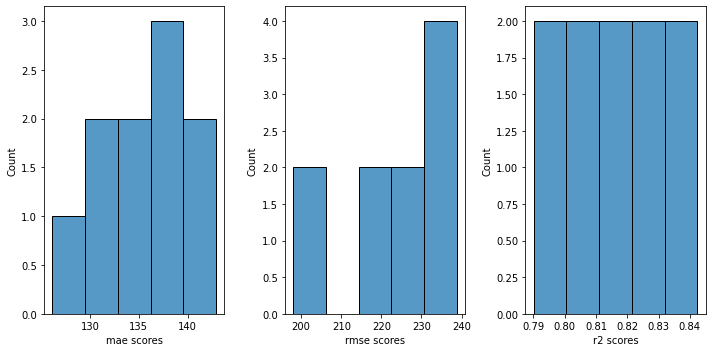

In [56]:
#Histograms of MAE, RMSE and R2 from the CV

df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(10, 5)

sns.histplot(df_scores['mae scores'],ax=ax1)
sns.histplot(df_scores['rmse scores'],ax=ax2)
sns.histplot(df_scores['r2 scores'],ax=ax3)

plt.tight_layout()
plt.show()

In [114]:
#train the new model on training data
nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=0)

In [115]:
#predict y in training data
train = nn.predict(X_train)

In [116]:
#Results of training data in a df
tr = pd.DataFrame(data=[["Training Set",*evaluate(y_train, train)]], 
                          columns=["Neural Network",'MAE', 'RMSE', 'R2 Square'])
tr

,Neural Network,MAE,RMSE,R2 Square
0,Training Set,127.703193,209.727082,0.838634


In [117]:
#Test on unseen data
test= nn.predict(X_test)

In [118]:
#Results in a df, values closer to cross validation results
te = pd.DataFrame(data=[["Test Set",*evaluate(y_test, test)]], 
                          columns=["Neural Network",'MAE', 'RMSE', 'R2 Square'])
te

,Neural Network,MAE,RMSE,R2 Square
0,Test Set,134.821101,227.815657,0.812584


In [119]:
#combine results of train and test
re_nn = tr.append(te, ignore_index=True)
re_nn

,Neural Network,MAE,RMSE,R2 Square
0,Training Set,127.703193,209.727082,0.838634
1,Test Set,134.821101,227.815657,0.812584


In [52]:
#For report
parameters = pd.DataFrame(data=[["hidden_layer_sizes", "50"],["activation", "relu"], ["solver", "adam"], 
                                ["learning_rate", "constant"], ["max_iter", "500"]], 
                          columns=['Hyperparameters (ANN)', 'Values'])
parameters

,Hyperparameters (ANN),Values
0,hidden_layer_sizes,50
1,activation,relu
2,solver,adam
3,learning_rate,constant
4,max_iter,500


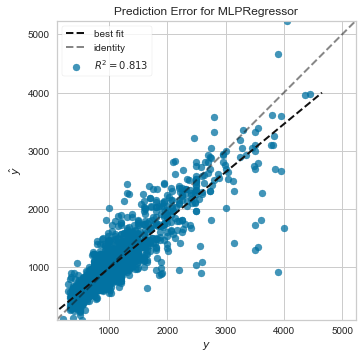

In [57]:
#Visualise Actual vs Predict plot

visualizer = prediction_error(nn, X_train, y_train, X_test, y_test)

In [151]:
#To plot learning curve for the model

train_errors, test_errors = [], []

for m in range(50, len(X_train), 100):
    nn.fit(X_train[:m], y_train[:m])
    y_train_predict = nn.predict(X_train[:m])
    y_test_predict = nn.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train[:m]))
    test_rmse = np.sqrt(mean_squared_error(y_test_predict, y_test))
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)



(150.0, 1000.0)

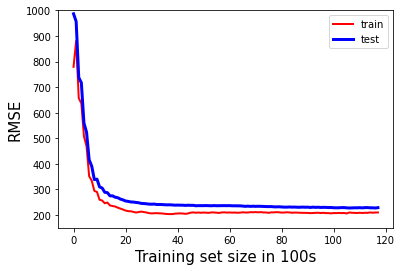

In [152]:
#Plot the learning curve
plt.plot(train_errors, "r-",linewidth=2, label="train")
plt.plot(test_errors, "b-", linewidth=3, label="test")
plt.legend(loc="upper right")
plt.figsize=(8,8)
plt.xlabel("Training set size in 100s")
plt.ylabel("RMSE")
plt.ylim((150, 1000))

<b>Model Comparison plots for the report</b>

In [143]:
#For Report
#Create a DF with results from all the models

data = np.array([["XGBoost","114.8318","204.9405", "0.8483"],
                 ["Random Forest","119.5418","213.2151", "0.8358"],
                 ["ANN","134.8211","227.8157", "0.8126"],
                 ["Decision Tree","135.9601","233.4544", "0.8032"],
                 ["LASSO","162.2170","254.0587", "0.7669"],
                 ["MLR","162.3675","254.1566", "0.7667"]]) 

# pass column names in the columns parameter 
df_report = pd.DataFrame(data, columns = ['models', 'MAE','RMSE', "R2"])
df_report

,models,MAE,RMSE,R2
0,XGBoost,114.8318,204.9405,0.8483
1,Random Forest,119.5418,213.2151,0.8358
2,ANN,134.8211,227.8157,0.8126
3,Decision Tree,135.9601,233.4544,0.8032
4,LASSO,162.2170,254.0587,0.7669
5,MLR,162.3675,254.1566,0.7667


In [144]:
#Change data types from object to float
df_report['MAE'] = df_report['MAE'].astype(float, errors = 'raise')
df_report['RMSE'] = df_report['RMSE'].astype(float, errors = 'raise')
df_report['R2'] = df_report['R2'].astype(float, errors = 'raise')
print(df_report.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   models  6 non-null      object 
 1   MAE     6 non-null      float64
 2   RMSE    6 non-null      float64
 3   R2      6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 320.0+ bytes
None


In [145]:
#Select columns for plot
mod=df_report['models']
mae=df_report['MAE']
rmse=df_report['RMSE']
r2=df_report['R2']

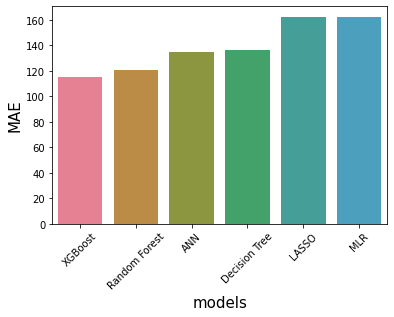

In [140]:
#Visualise comparison of MAE error values of all models
c_pal= sns.color_palette("husl", 8)

sns.barplot(x="models",y="MAE",palette=c_pal, data=df_report)
plt.xticks(rotation=45)
plt.show()


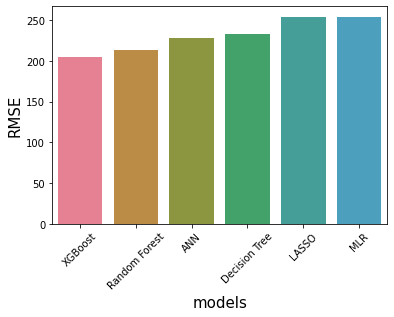

In [146]:
#Visualise comparison of RMSE error values of all models
c_pal= sns.color_palette("husl", 8)

sns.barplot(x="models",y="RMSE",palette=c_pal, data=df_report)
plt.xticks(rotation=45)
plt.show()

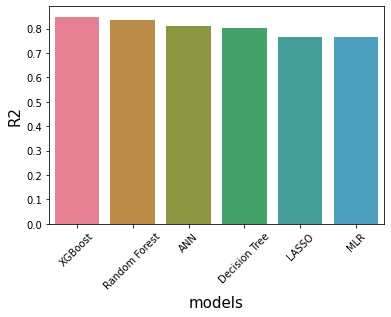

In [147]:
##Visualise comparison of R2 score values of all models
c_pal= sns.color_palette("husl", 8)

sns.barplot(x="models",y="R2",palette=c_pal, data=df_report)
plt.xticks(rotation=45)
plt.show()